In [1]:
!pip install scipy numpy matplotlib pandas sklearn tabulate seaborn folium geopy geopandas requests> /dev/null
from sklearn import metrics
%matplotlib notebook

You should consider upgrading via the '/Users/majchr/Developing/studia-python/MUM/MUM/ENV/bin/python -m pip install --upgrade pip' command.


In [72]:
# import importlib
# import sys
# importlib.reload(sys.modules['statistics.company'])
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split, learning_curve, permutation_test_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tabulate import tabulate
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os
import sys
sys.path.insert(0, os.path.abspath('./module-dir'))

In [3]:
from dataset_provider.provider import get_dataset
from dataset_provider.config import create_global_config
cfg = create_global_config()
df = get_dataset(cfg)

Taking data from local file...
Found 304 job ads without salary range or currency
(1249, 75)
        salary_from     salary_to
count   1249.000000   1249.000000
mean   11148.760608  15884.851081
std     4540.909690   5114.312359
min     1250.000000   1750.000000
25%     8000.000000  12100.000000
50%    10000.000000  16000.000000
75%    14000.000000  19000.000000
max    44000.000000  50000.000000
Found 8 countries and 4 currencies!
Dropping foreign countries and translating currencies...
Unique countries: 1, currencies: 1, observations: 1230


/Users/majchr/Developing/studia-python/MUM/MUM/ENV/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Statistics

### Plot company sizes and salary ranges

In [5]:
from statistics.company import plot_stats
plot_stats(df)

Found 75 jobs with salary over 80000, which won't be taken into account on plots below.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from statistics.percentage import count_percentage
count_percentage(df)

,Count,Percentage
javascript,222,18.0%
java,169,13.7%
net,97,7.9%
php,97,7.9%
devops,96,7.8%
other,95,7.7%
mobile,86,7.0%
testing,76,6.2%
python,69,5.6%
data,52,4.2%


<IPython.core.display.Javascript object>

,Count,Percentage
mid,730,59.3%
senior,448,36.4%
junior,52,4.2%


<IPython.core.display.Javascript object>

,Count,Percentage
b2b,903,73.4%
permanent,308,25.0%
mandate_contract,19,1.5%


<IPython.core.display.Javascript object>

---------------------------------------------------------------------------

# Heat maps

In [ ]:
from heat_maps.density_map import density_heat_map
density_heat_map(df)

<h2>Get province data </h2>

In [ ]:
from heat_maps.salary_map import show_map
show_map(df)

---------------------------------------------------------------------------

# Classification

In [ ]:
cl_df = df.copy()
for col in ["city", "Unnamed: 0", "title", "company_size", "country_code", "marker_icon", "company_name",
            "latitude", "longitude", "salary_currency", "published_at", "remote_interview", "id",
            "Vert.x", "skills", "-"]:
                cl_df=cl_df.drop(col, axis=1)
print(cl_df.columns)
cols_for_encoding = [c for c in cl_df.select_dtypes(include=['object']).copy().columns if c != "experience_level"]
print(cols_for_encoding)
cl_df = pd.get_dummies(cl_df, columns=cols_for_encoding)

In [ ]:
print(len(cl_df.columns))

# Dimensionality reduction experiments

In [4]:
pca_df = df.copy()
for col in ["city", "Unnamed: 0", "title", "company_size", "country_code", "marker_icon", "company_name",
            "latitude", "longitude", "salary_currency", "published_at", "remote_interview", "id",
            "Vert.x", "skills", "-"]:
                pca_df=pca_df.drop(col, axis=1)
col_level = ['.NET', 'Design', 'Network', 'REST API', 'Embeded',
       'Cloud', 'Database', 'Android', 'IT', 'Soft Skills', 'Scrum master',
       'Mobile', 'Common', 'JavaScript', 'DevOps', 'Software engineering',
       'Testing', 'Automation', 'Shell Scripting', 'Backend', 'Data Science',
       'Blockchain', 'C++', 'Client Service', 'Front-end', 'Civil Engineering',
       'Developer', 'iOS', 'SQL', 'Python', 'PHP', 'Erlang', 'Scala', 'Git',
       'Games', 'Golang', 'Google', 'Java', 'Web', 'Consultant',
       'Project Manager', 'Analitics', 'CRM', 'Perl', 'R', 'Ruby', 'Rust',
       'SAP', 'CSS', 'XML', 'Salesforce', 'API', 'Data', 'Excel']
col_other = ['remote', 'salary_from', 'salary_to', 'employment_type_b2b', 'employment_type_mandate_contract', 'employment_type_permanent']
print(pca_df.columns)
cols_for_encoding = [c for c in pca_df.select_dtypes(include=['object']).copy().columns if c != "experience_level"]
print(cols_for_encoding)
pca_df = pd.get_dummies(pca_df, columns=cols_for_encoding)
n_components_pca = cfg.n_components_pca

Index(['remote', 'experience_level', 'salary_from', 'salary_to',
       'employment_type', '.NET', 'Design', 'Network', 'REST API', 'Embeded',
       'Cloud', 'Database', 'Android', 'IT', 'Soft Skills', 'Scrum master',
       'Mobile', 'Common', 'JavaScript', 'DevOps', 'Software engineering',
       'Testing', 'Automation', 'Shell Scripting', 'Backend', 'Data Science',
       'Blockchain', 'C++', 'Client Service', 'Front-end', 'Civil Engineering',
       'Developer', 'iOS', 'SQL', 'Python', 'PHP', 'Erlang', 'Scala', 'Git',
       'Games', 'Golang', 'Google', 'Java', 'Web', 'Consultant',
       'Project Manager', 'Analitics', 'CRM', 'Perl', 'R', 'Ruby', 'Rust',
       'SAP', 'CSS', 'XML', 'Salesforce', 'API', 'Data', 'Excel'],
      dtype='object')
['employment_type']


In [76]:
def get_vatiance_rations(featureset_standatized):
    covariance_matrix = np.cov(featureset_standatized.T)
    eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
    return eigen_vals, eigen_vecs

def plot_variance_explained_ratios(eigen_vals, eigen_vecs, features, extend_title = ""):
    #calculate cumulative sum of explained variances
    tot = sum(eigen_vals)
    var_exp = [(i/tot) for i in sorted (eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize=(15,15))
    plt.bar(range(1, features.shape[0] + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1,features.shape[0] + 1), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio' + extend_title)
    plt.xlabel('Principal component index')
    plt.xticks(range(features.shape[0]),features, rotation=90, ha='left')
    plt.legend(loc='best')
    plt.show()

def get_pca_data(x, n_c = cfg.n_components_pca):
    sc = StandardScaler()
    x_standarded = sc.fit_transform(x)
    # train set
    eigen_vals, eigen_vecs = get_vatiance_rations(x_standarded)
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i], x.columns[i]) for i in range(len(eigen_vals))]
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    plot_variance_explained_ratios(eigen_vals,eigen_vecs, np.array(eigen_pairs)[:,2])
    column_names = ['eigen value', 'feature name']
    data = {column_names[0]: np.array(eigen_pairs)[0:, 0],
            column_names[1]: np.array(eigen_pairs)[0:, 2]
           }
    eigen_df = pd.DataFrame(data, columns=column_names)
    #creation of n_components_pca matrix
    w_x_descending = np.array(eigen_pairs[0][1][:, np.newaxis])
    for i in range(1, 2):
        w_x_descending = np.hstack((w_x_descending, eigen_pairs[i][1][:, np.newaxis]))
    print(w_x_descending.shape)
    x_transformed_desc = x_standarded.dot(w_x_descending)
    return x_transformed_desc

def plot_t_SNE(x_data, p, l_r):
    colors = ["#476A2A", "#7851B8", "#BD3430"]
    extra0 = Rectangle((0, 0), 1, 1, color="#476A2A", linewidth=0)
    extra1 = Rectangle((0, 0), 1, 1, color="#7851B8", linewidth=0)
    extra2 = Rectangle((0, 0), 1, 1, color="#BD3430", linewidth=0)
    
    tsne = TSNE(perplexity=p, learning_rate=l_r, random_state=42)
    x_tsne = tsne.fit_transform(x_data)
    plt.figure(figsize=(10, 10))
    plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 0].max() + 1)
    plt.ylim(x_tsne[:, 1].min(), x_tsne[:, 1].max() + 1)
    for i in range(len(x_all)):
        plt.text(x_tsne[i, 0], x_tsne[i, 1], str(y[i]),
                 color = colors[y[i]],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.title("t-student Stochastic Neighbor Embedding")
    plt.xlabel("t-SNE feature 0")
    plt.ylabel("t-SNE feature 1")
    plt.legend([extra0,extra1,extra2],["0 - junior", "1 - mid", "2 - senior"],loc='upper right')

def plot_PCA_2_components(x_data):
    colors = ["#476A2A", "#7851B8", "#BD3430"]
    extra0 = Rectangle((0, 0), 1, 1, color="#476A2A", linewidth=0)
    extra1 = Rectangle((0, 0), 1, 1, color="#7851B8", linewidth=0)
    extra2 = Rectangle((0, 0), 1, 1, color="#BD3430", linewidth=0)
    
    x_pca = get_pca_data(x_data, 2)
    plt.figure(figsize=(10, 10))
    plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max() + 1)
    plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max() + 1)
    for i in range(len(x_all)):
        plt.text(x_pca[i, 0], x_pca[i, 1], str(y[i]),
                 color = colors[y[i]],
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("PCA component 0")
    plt.ylabel("PCA component 1")
    plt.title("Principal component Analysis")
    plt.legend([extra0,extra1,extra2],["0 - junior", "1 - mid", "2 - senior"],loc='upper right')



<IPython.core.display.Javascript object>


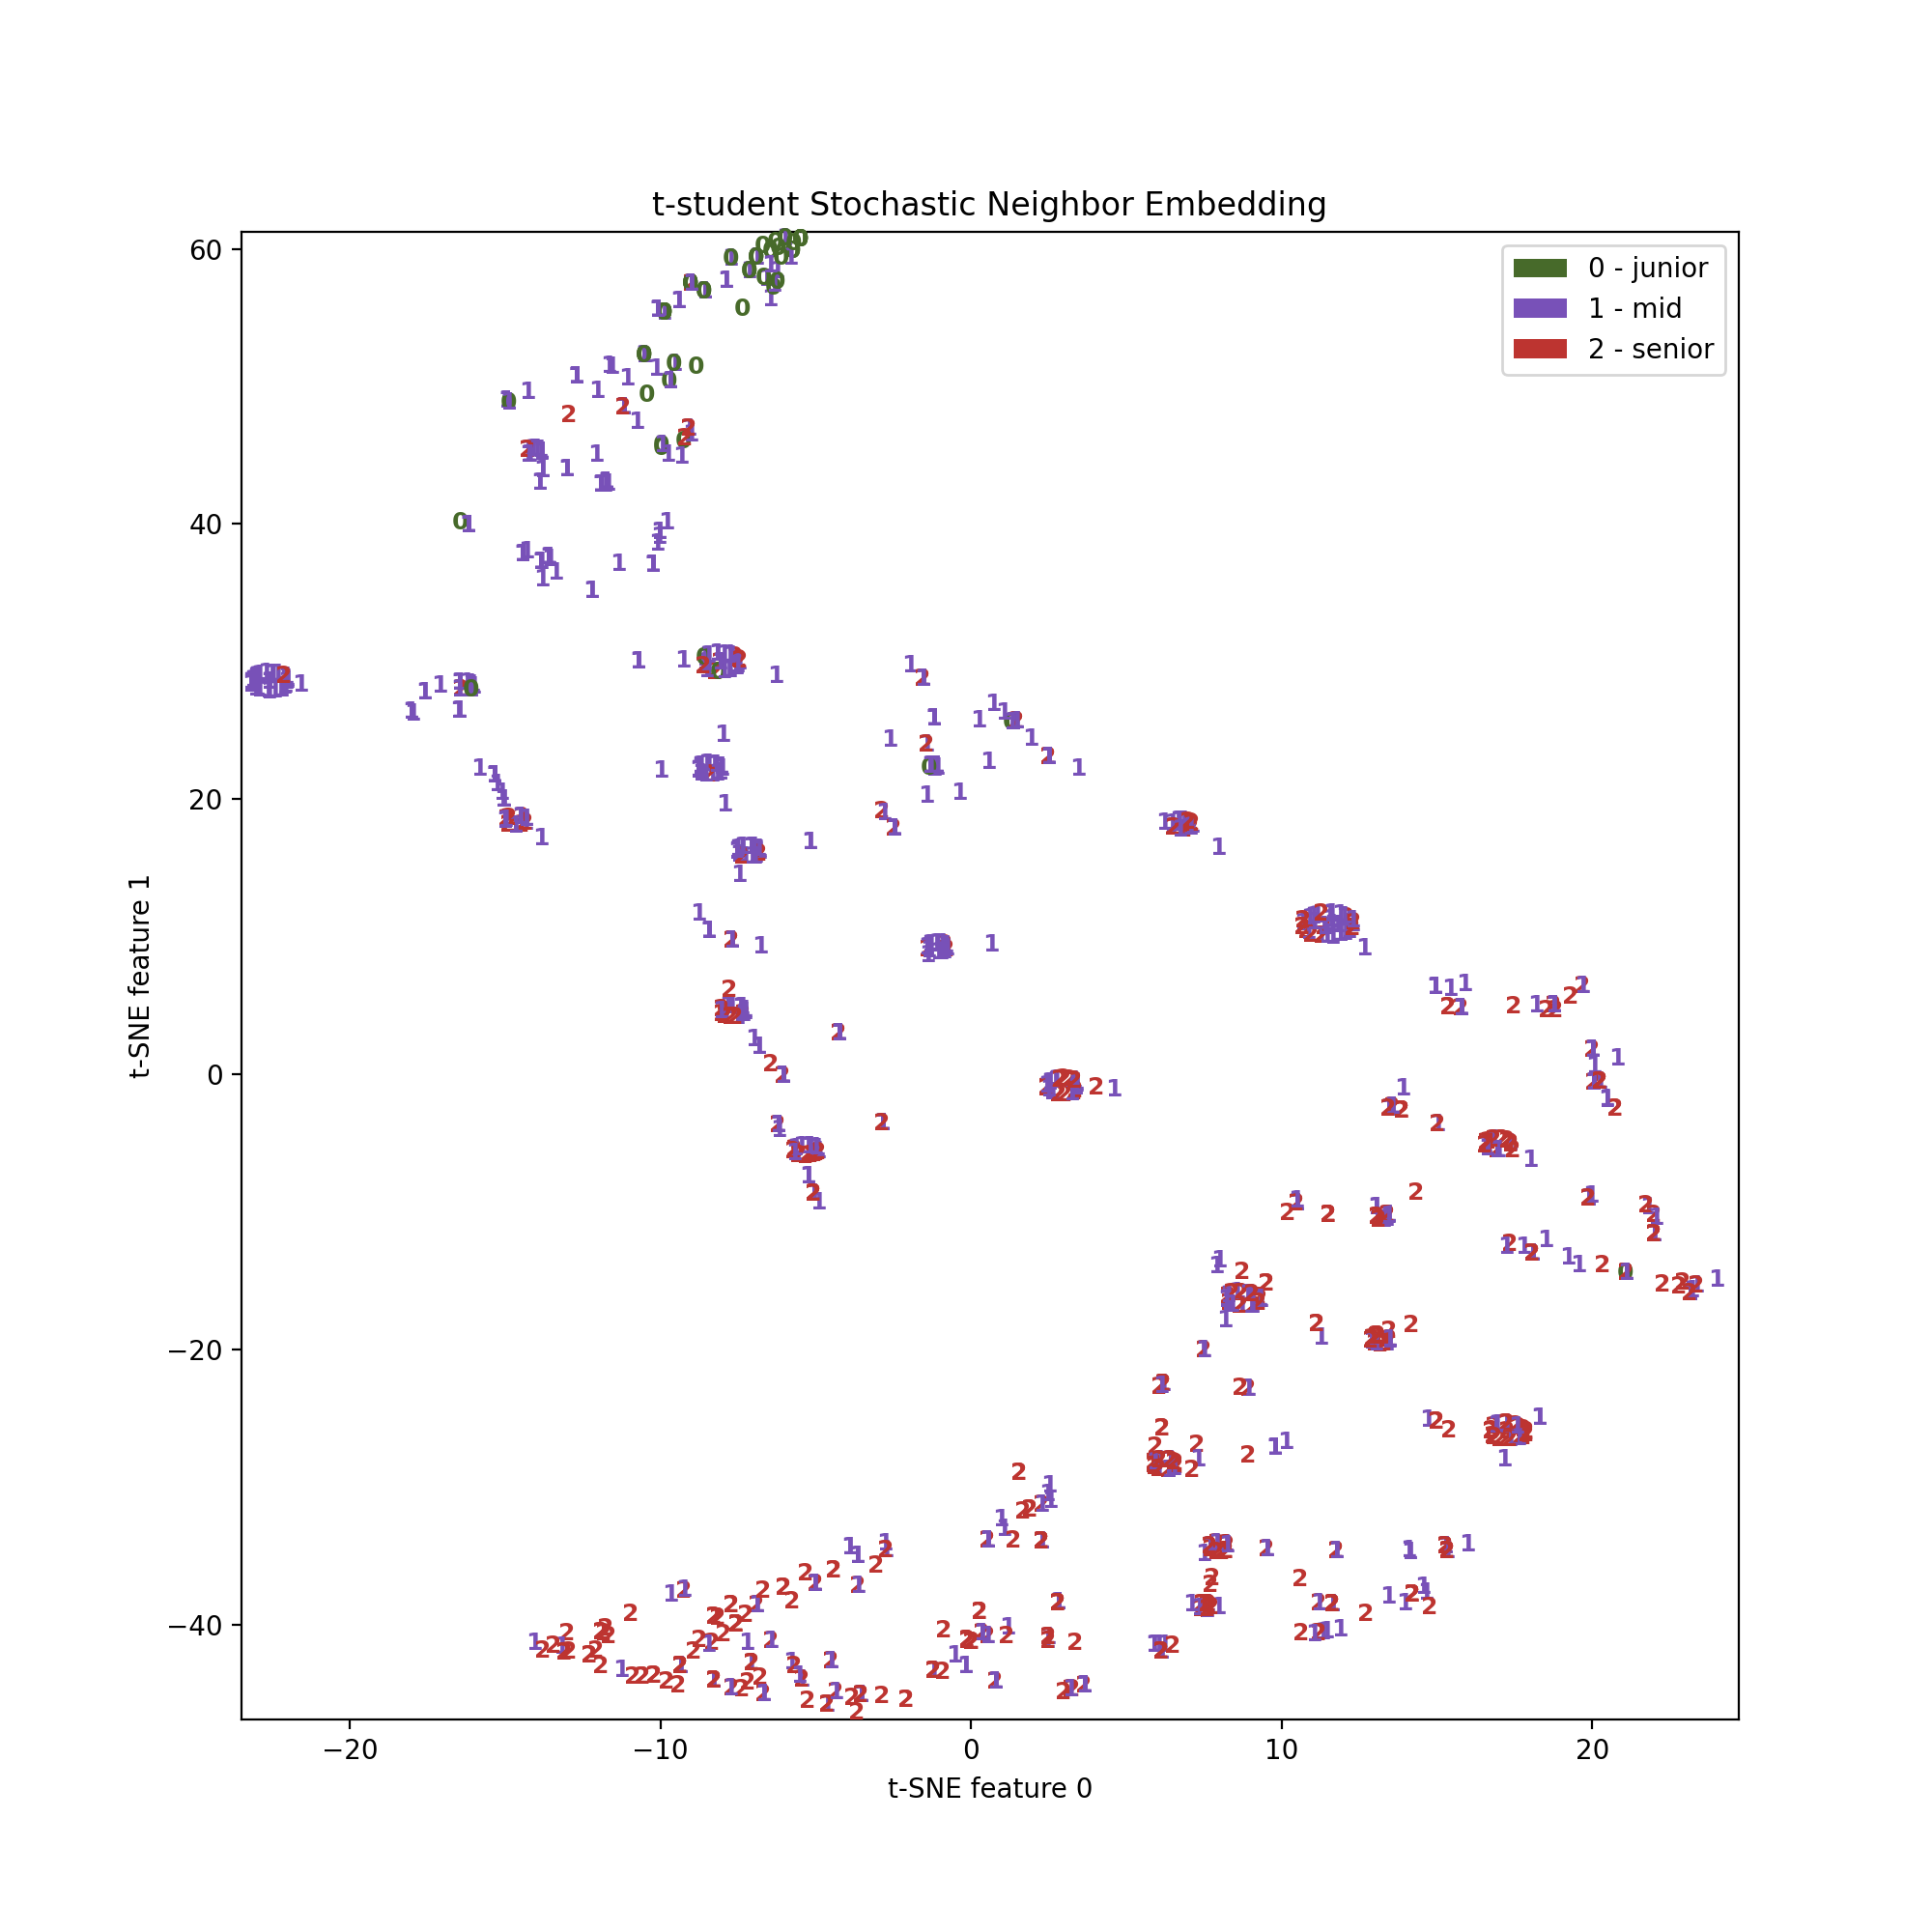

<IPython.core.display.Javascript object>


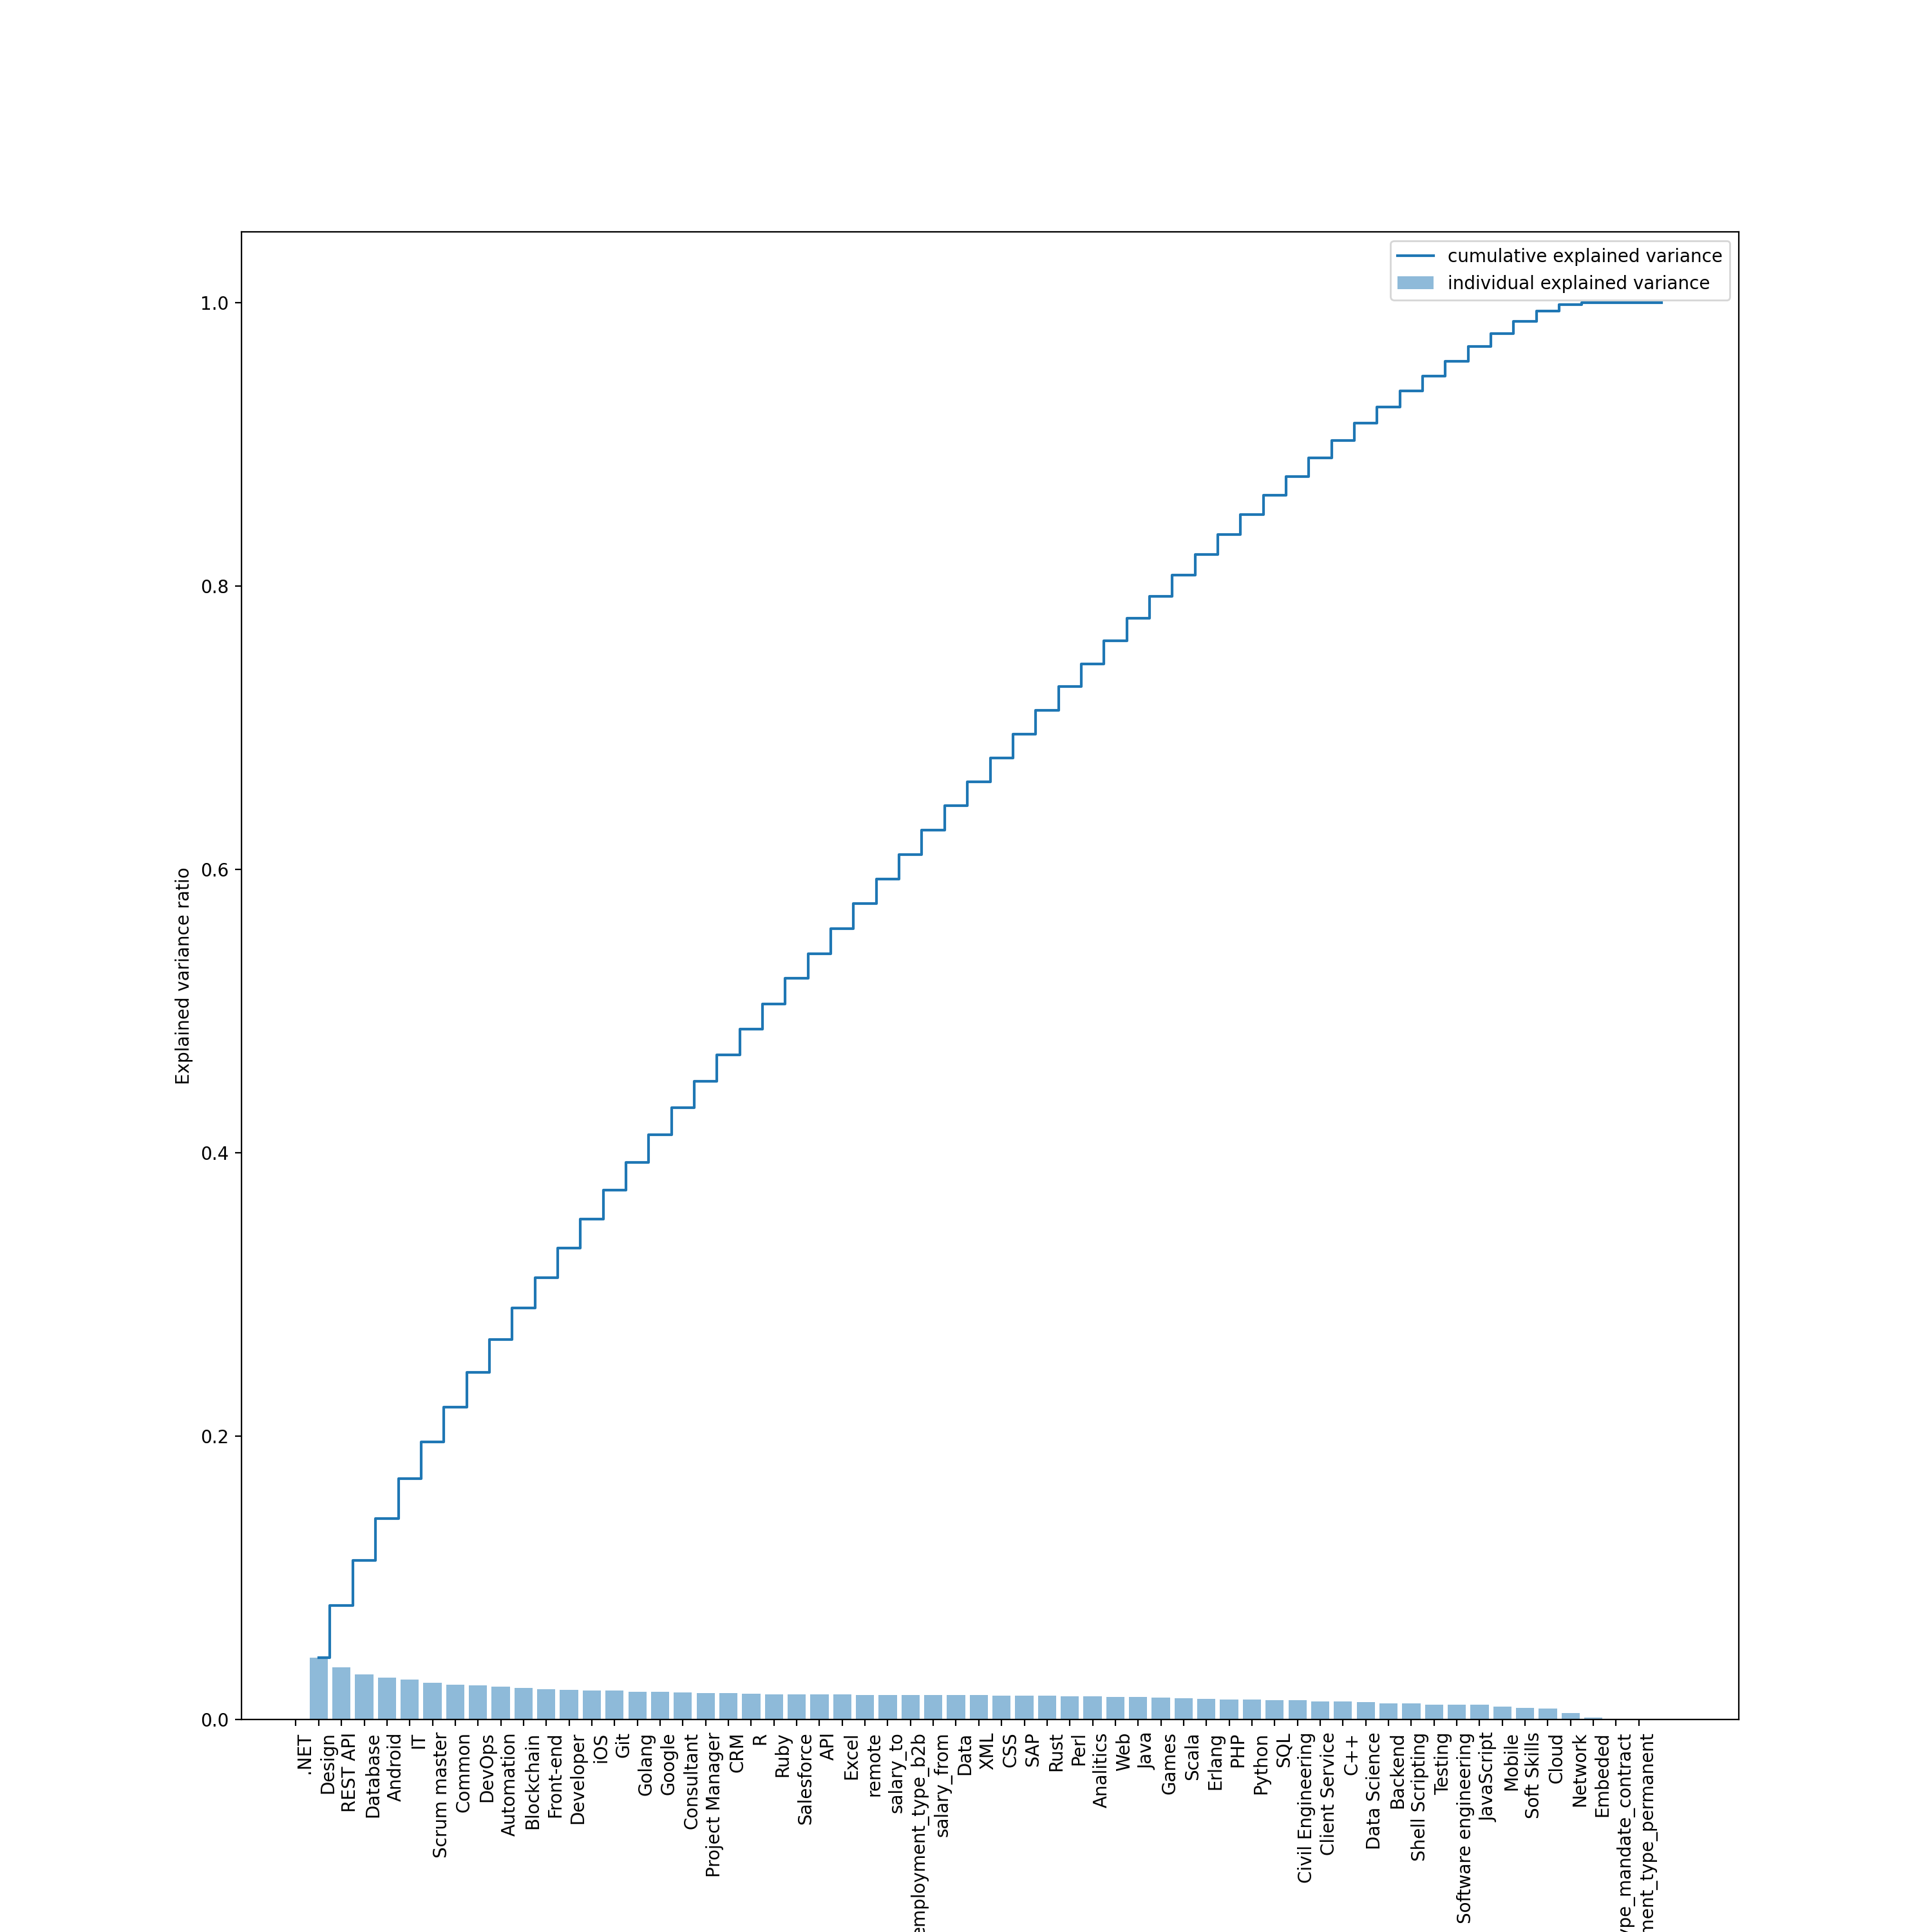

(60, 2)


<IPython.core.display.Javascript object>


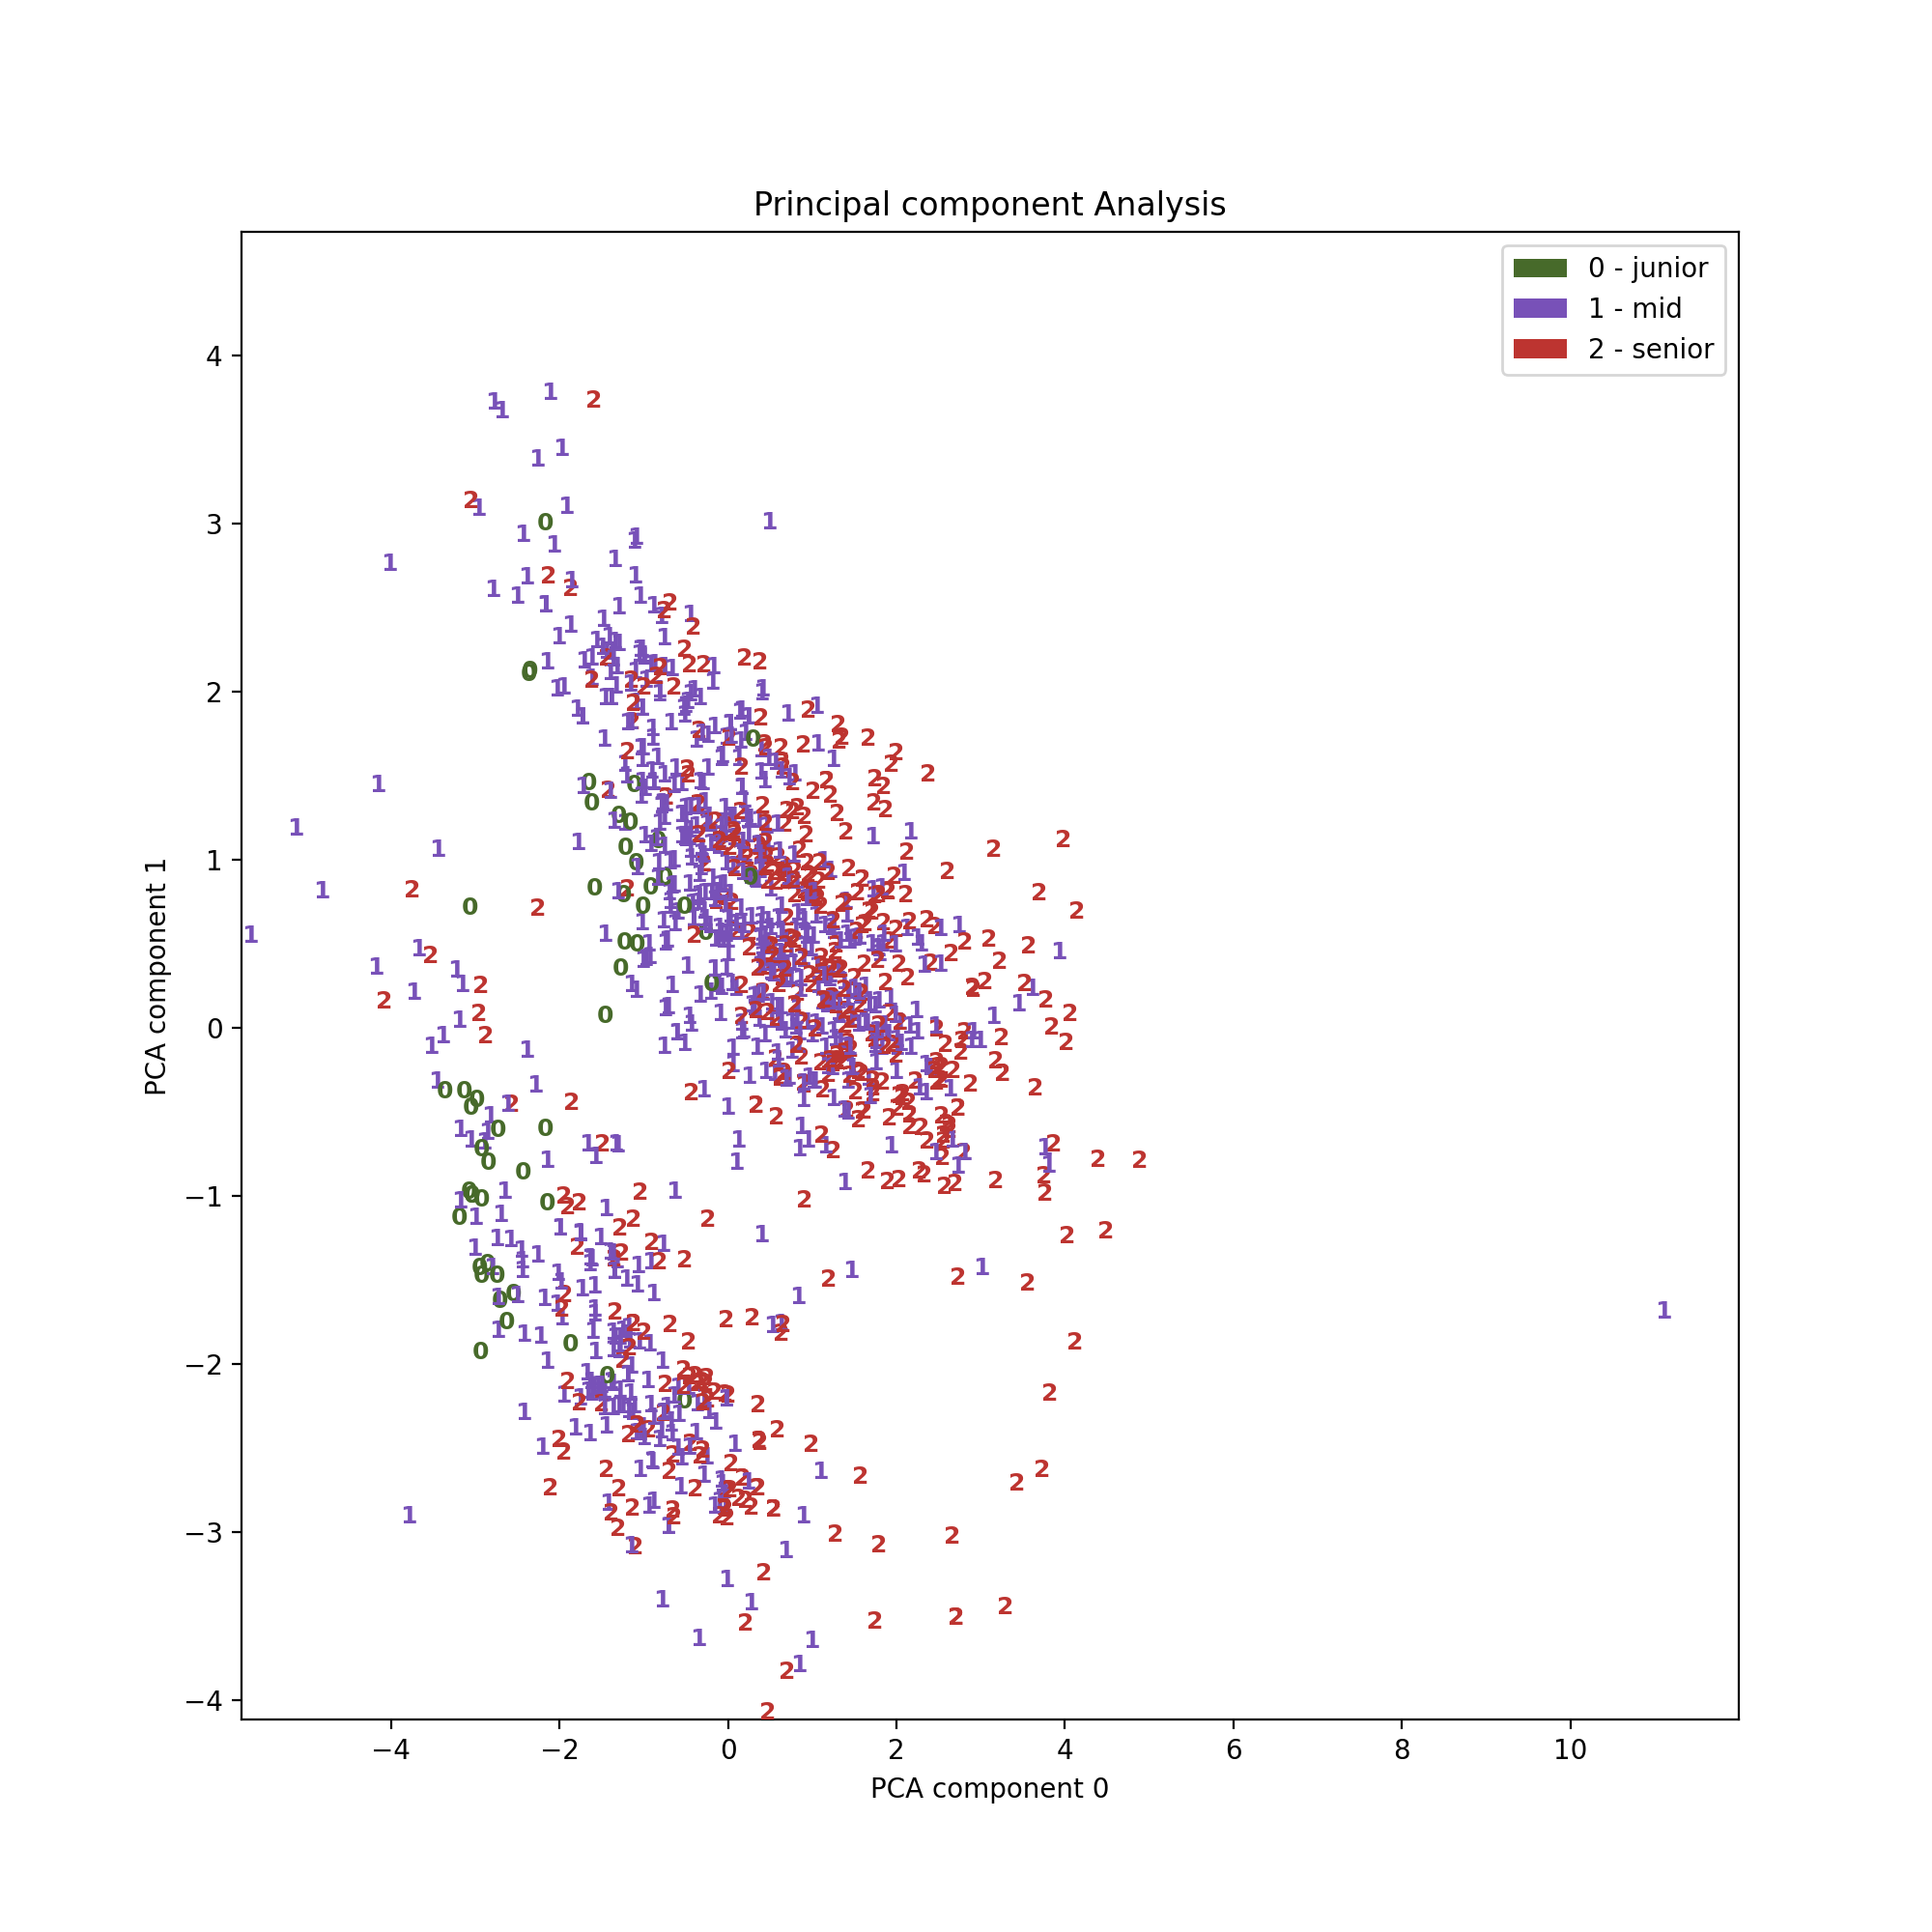

In [77]:
def move_col_to_end(df, col):
    cols_at_end = [col]
    return df[[c for c in df if c not in cols_at_end] 
            + [c for c in cols_at_end if c in df]]

pca_df = move_col_to_end(pca_df, "experience_level")
array = pca_df.values
x = array[:,0:len(pca_df.columns)-1]
y = array[:,len(pca_df.columns)-1]
x = normalize(x)
le = LabelEncoder()
y = le.fit_transform(y)
x_skills = pca_df[col_level]
x_other = pca_df[col_other]
x_all = pca_df[(col_level + col_other)]
plot_t_SNE(x_all, 35, 170)
plot_PCA_2_components(x_all)

<IPython.core.display.Javascript object>


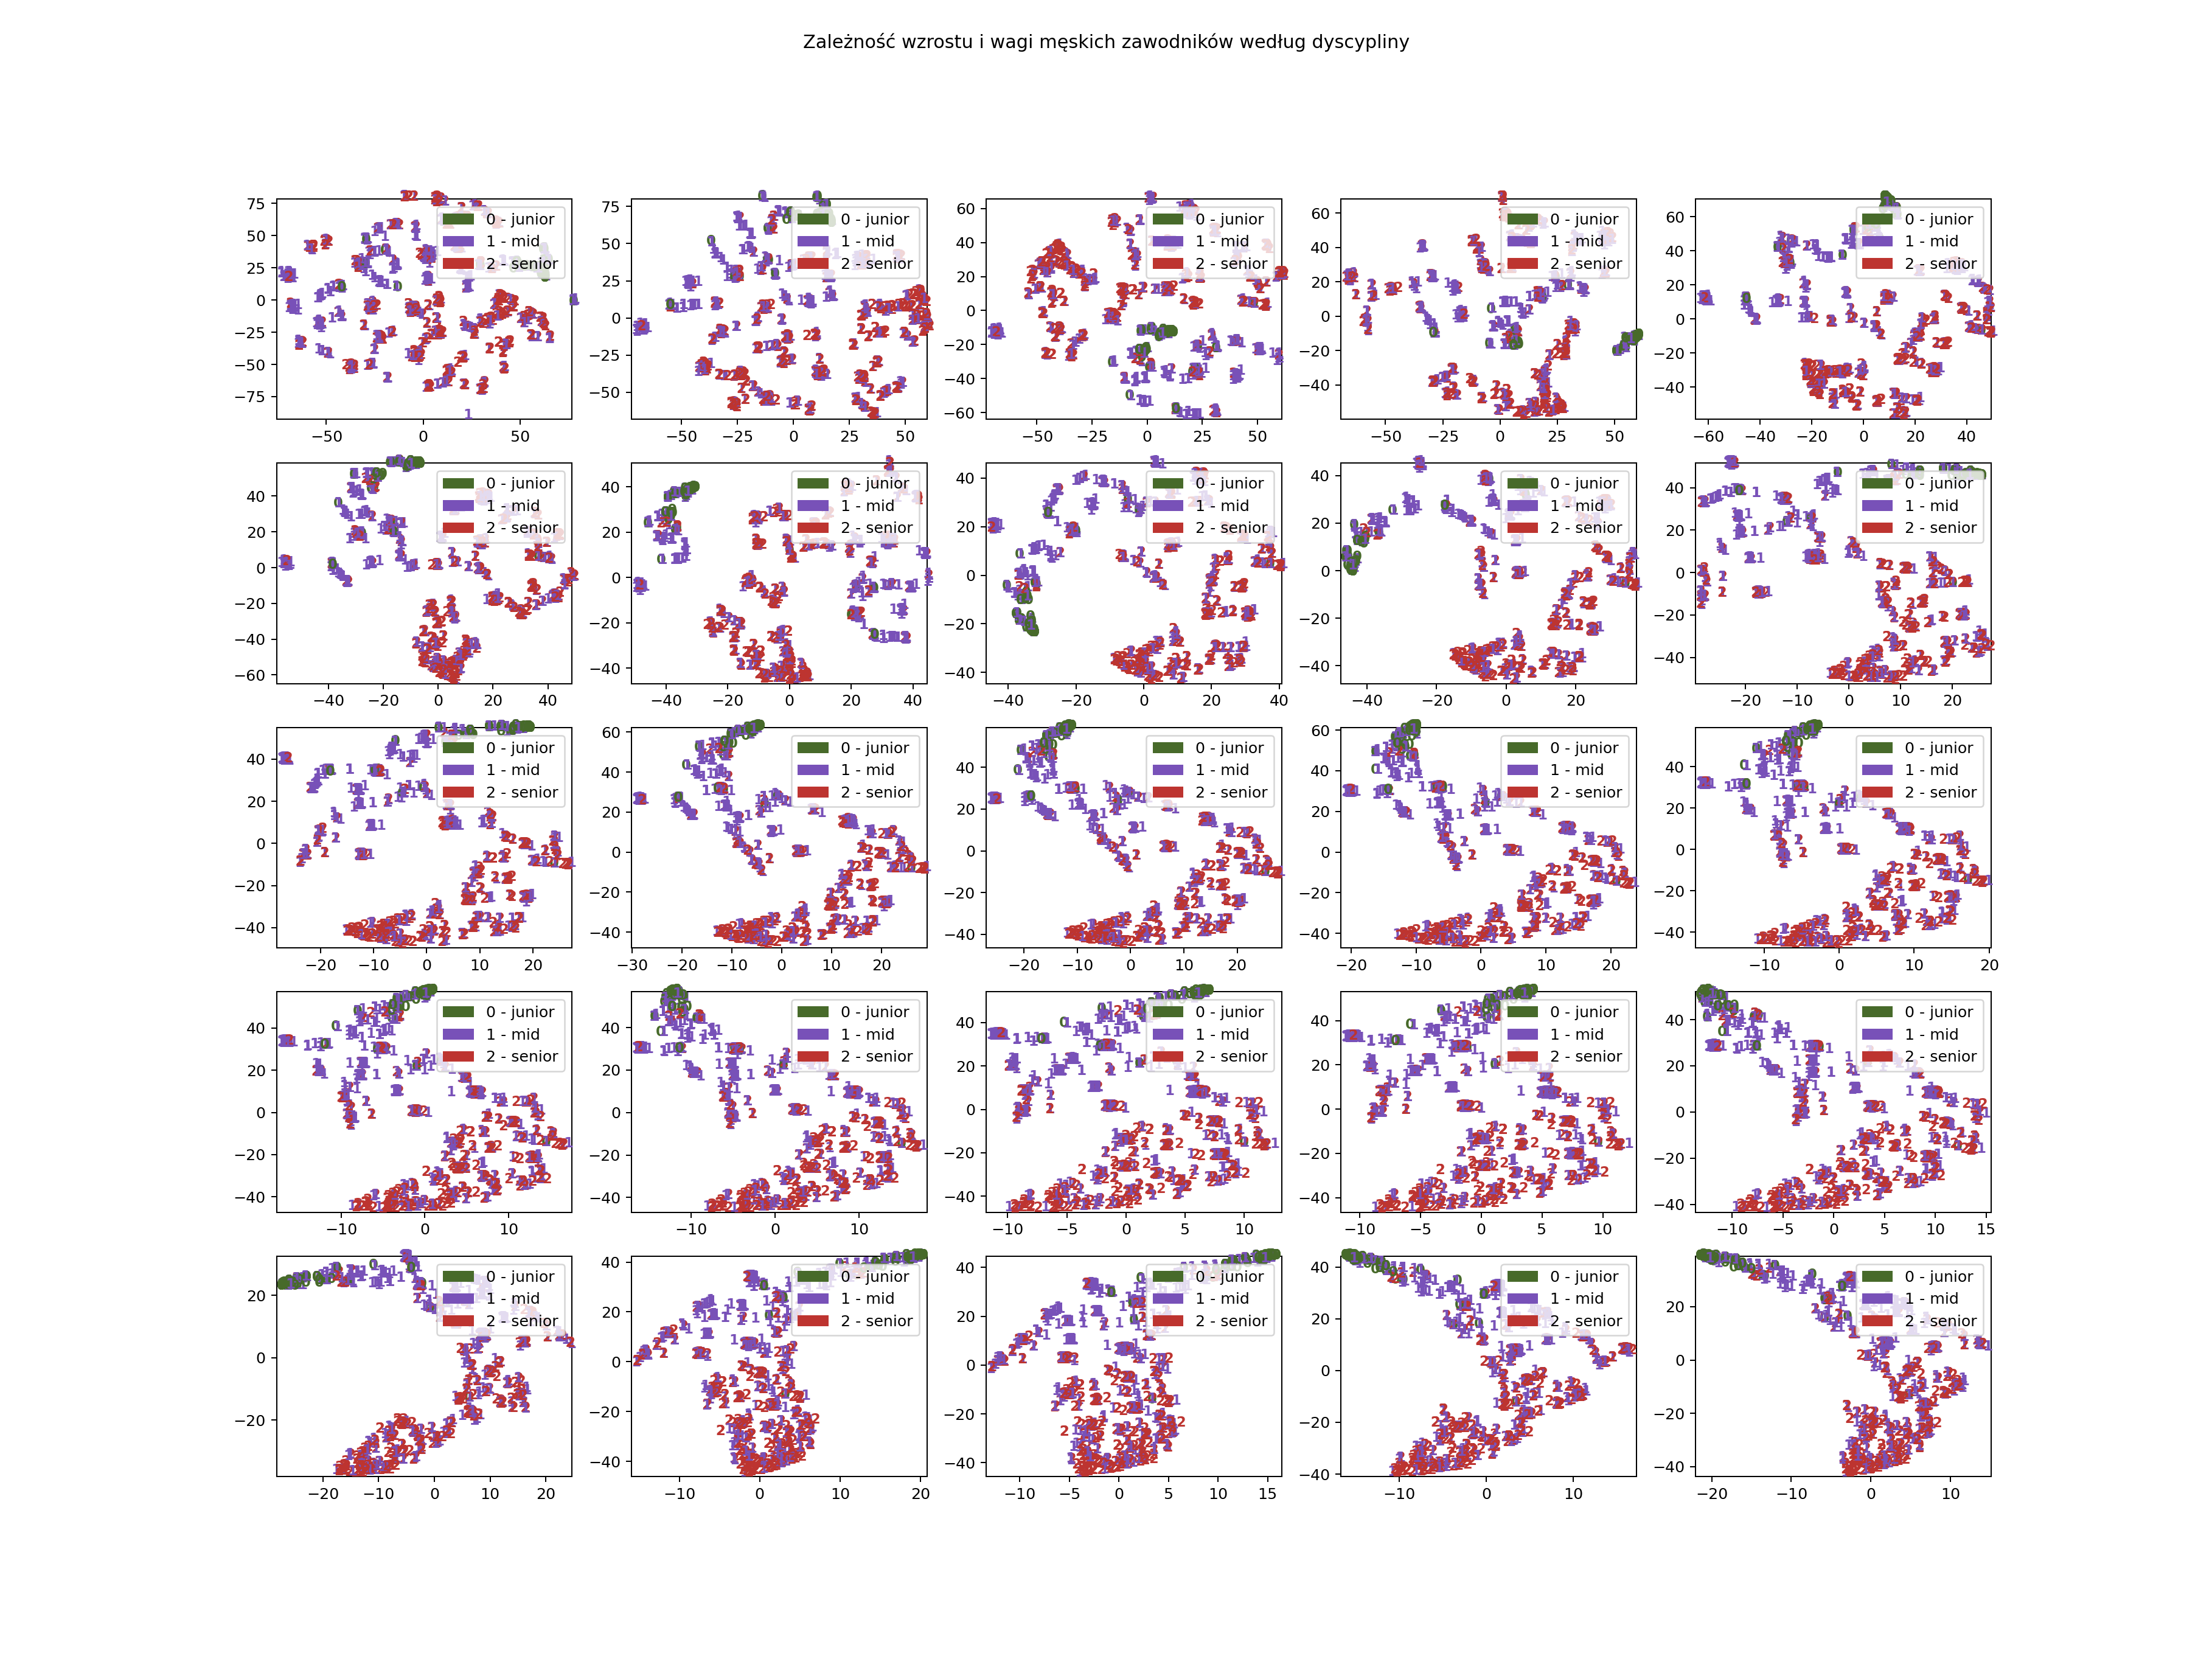

In [68]:
f, axarr = plt.subplots(5,5, figsize=(20,15))
f.suptitle('Zależność wzrostu i wagi męskich zawodników według dyscypliny')
for k in range(0,5):
    for j in range(0,5):
        tsne = TSNE(perplexity=10 + (j + k*5)*2, learning_rate= 170 , random_state=42)
        digits_tsne = tsne.fit_transform(x_all)
        axarr[k,j].set_xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
        axarr[k,j].set_ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
        for i in range(len(x_all)):
            # actually plot the digits as text instead of using scatter
            axarr[k,j].text(digits_tsne[i, 0], digits_tsne[i, 1], str(y[i]),
                     color = colors[y[i]],
                     fontdict={'weight': 'bold', 'size': 9})
        axarr[k,j].set_label("t-SNE feature 0")
        axarr[k,j].set_label("t-SNE feature 1")
        axarr[k,j].legend([extra0,extra1,extra2],["0 - junior", "1 - mid", "2 - senior"],loc='upper right')

----------------------------------------

In [ ]:
def move_col_to_end(df, col):
    cols_at_end = [col]
    return df[[c for c in df if c not in cols_at_end] 
            + [c for c in cols_at_end if c in df]]

cl_df = move_col_to_end(cl_df, "experience_level")
array = cl_df.values
x = array[:,0:len(cl_df.columns)-1]
y = array[:,len(cl_df.columns)-1]
x = normalize(x)
le = LabelEncoder()
y = le.fit_transform(y)
#na podstawie x i y otrzymujemy tablice testowe i wynikowe
x_train, x_validation, y_train, y_validation = train_test_split(x,y, test_size=cfg.test_size, random_state=1)

In [ ]:
models = []
models.extend([
    ('KNN', KNeighborsClassifier(), 0),
    ('CART', DecisionTreeClassifier(), 1),
    ('NB', GaussianNB(), 2),
    ('SVM', SVC(gamma='auto'), 3),
    ('MLP', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(50,10), max_iter=5000), 4)
    ])
def plot_show():
    pyplot.draw()
    pyplot.pause(0.1)

def get_specificity(y_validate, y_predicted):
    cnf_matrix = confusion_matrix(y_validate, y_predicted)
    
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)
    
    FP = FP.astype(float)
    TN = TN.astype(float)
        
    return np.mean(TN/(TN+FP))
    
def get_learning_curve(classification_model, training_set_enlarging_step=10):
    train_sizes = np.linspace(0.1, 1, training_set_enlarging_step)
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = classification_model,
        X = x,
        y = y, 
        train_sizes = train_sizes,
        cv = 5,
        scoring = 'accuracy')
    return train_sizes, train_scores, validation_scores

def plot_learning_curve(model,name):
    train_sizes, train_scores, test_scores = \
        get_learning_curve(model)

    plt.style.use('seaborn')
    plt.plot(train_sizes, -train_scores.mean(axis = 1), color= 'red', label = 'Training error')
    plt.plot(train_sizes, -test_scores.mean(axis = 1), color= 'navy',label = 'Validation error')
    plt.ylabel('Accuracy', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a %s' % name, fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()
    
def compare_algorithms(results, names):
    fig = pyplot.figure()
    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(1,1,1)
    ax.set_title("Algorithm Comparison")
    ax.boxplot(results, labels=names)
    plot_show()

def print_scores(cv_results, predictions):
    print('\nMean %f' % cv_results.mean())
    print('STD %f' % cv_results.std())
    print('\nConfusion matrix:')
    print(confusion_matrix(y_validation, predictions))
    print('\nAccuracy %f' % accuracy_score(y_validation, predictions))
    print('Precision %f' % precision_score(y_validation, predictions, average = 'weighted'))
    print('Recall %f' % recall_score(y_validation, predictions, average = 'weighted'))
    print('Specificity %f' % get_specificity(y_validation, predictions))
    print('\nClassification report:')
    print(classification_report(y_validation, predictions))

def plot_roc_curves():
    fig = pyplot.figure()
    ax = plt.gca()
    for name, model, subplot_row in models:
        rfc_disp = plot_roc_curve(model, x_validation, 
                                  y_validation, ax=ax, alpha=0.8)
    plt.show()

def accuracySignificancy(model, x_train, y_train, cv):
    fig = pyplot.figure()
    fig.suptitle("Estimating accuracy score's statistical significancy")
    ax = fig.add_subplot(1,1,1)
    n_classes = np.unique(y_train).size
    score, permutation_scores, pvalue = permutation_test_score(model, x_train, y_train, scoring="accuracy", cv=cv, n_permutations=100)
    print("Classification score %s (pvalue : %s)" % (score, pvalue))
    # View histogram of permutation scores
    ax.hist(permutation_scores, 20, label='Permutation scores',
             edgecolor='black')
    ylim = plt.ylim()
    ax.set_xlabel('Score')
    plt.show()

def evaluate_per_dataset():
    results = []
    names = []
    
    for name, model, subplot_row in models:
            print(f"---------------------------\nRunning classification for: {name}")
            kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
            cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
            accuracySignificancy(model, x_train, y_train, kfold)
            results.append(cv_results)
            names.append(name)

            # Make predictions on validation dataset
            model.fit(x_train, y_train)
            predictions = model.predict(x_validation)
            
            print_scores(cv_results, predictions)
            plot_learning_curve(model,name)

    # Compare Algorithms - ROC etc
    compare_algorithms(results, names)

In [ ]:
evaluate_per_dataset()

# Regression

In [ ]:
print(cl_df.head())

In [ ]:
cl_df = df.copy()
for col in ["salary_to", "city", "Unnamed: 0", "title", "company_size", "country_code", "marker_icon", "company_name",
            "latitude", "longitude", "salary_currency", "published_at", "remote_interview", "id",
            "Vert.x", "skills", "-"]:
                cl_df=cl_df.drop(col, axis=1)

In [ ]:
cols_for_encoding = [c for c in cl_df.select_dtypes(include=['object', 'boolean']).copy().columns]
cl_df = pd.get_dummies(cl_df, columns=cols_for_encoding)
cl_df = move_col_to_end(cl_df, "salary_from")
array = cl_df.values
x = array[:, 0:len(cl_df.columns)-1]
y = array[:, len(cl_df.columns)-1]
x = normalize(x)
print(x[0])

In [ ]:
print(x[0])

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x,y, test_size=cfg.test_size, random_state=1)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 56)
# x = pca.fit_transform(x)
# print(len(x[0]))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # doctest: +SKIP
scaler.fit(x_train)  # doctest: +SKIP
x_train = scaler.transform(x_train)  # doctest: +SKIP
x_validation = scaler.transform(x_validation)  # doctest: +SKIP

In [ ]:
cl_df.columns

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, SGDRegressor, ARDRegression
from sklearn.linear_model import MultiTaskLasso, MultiTaskLassoCV, HuberRegressor, TheilSenRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_data(axes, title, x_train, y_train, x_test, y_test):
    axes.set_title(title)
    axes.scatter(x_train[:,0], y_train, color="green"),
    axes.plot(x_test, y_test, color="red", linewidth=1)
    
models = [
#     LinearRegression(),
    HuberRegressor(alpha=0.00001, epsilon=1.6, max_iter=5000),
    BayesianRidge(),
#     SGDRegressor(),
#     ARDRegression(),
#     TheilSenRegressor(),
#     MultiTaskLasso(),
#     MultiTaskLassoCV(),
#     OrthogonalMatchingPursuit(),
#     Lars(),
#     MLPRegressor(hidden_layer_sizes=(9), solver='lbfgs', tol=1e-6, learning_rate='adaptive', max_iter=3000, n_iter_no_change=100),
#     MLPRegressor(hidden_layer_sizes=(9), alpha=1e-8, solver='lbfgs', tol=1e-6, learning_rate='adaptive', max_iter=3000, n_iter_no_change=100),
#     MLPRegressor(hidden_layer_sizes=(9), alpha=1, solver='lbfgs', tol=1e-6, learning_rate='adaptive', max_iter=3000, n_iter_no_change=100),
#     MLPRegressor(hidden_layer_sizes=(16), solver='sgd', learning_rate='adaptive', max_iter=500, n_iter_no_change=100),
#     SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
#     SVR(kernel='poly', C=100, gamma='scale', degree=3, epsilon=.1, coef0=1),
#     SVR(kernel='linear', C=100, gamma='scale'),
#     SVR(kernel='rbf'),
#     SVR(kernel='poly', degree=60, gamma='scale'),
#     SVR(kernel='linear', gamma='scale'),    
#     SVR(kernel='sigmoid', gamma='scale'),
#     SVR(kernel='precomputed', gamma='auto'),
    Lasso(alpha=0.1, max_iter=1000_00, random_state=True),
    ElasticNet(alpha=0.01, max_iter=1000_00, random_state=True)]

# f, axarr = plt.subplots(len(models), sharex=True, sharey=True,figsize=(12,12))
for y, model in enumerate(models):
        y_test = model.fit(x_train, y_train).predict(x_validation)
#         plot_data(axarr[y], type(model).__name__, x_train, y_train, x_validation, y_test)
        print(f"{type(model).__name__} MAE: {mean_absolute_error(y_validation, y_test, )} | MSE: {mean_squared_error(y_validation, y_test, )}")

In [ ]:
for i, y in enumerate(y_validation):
    print(f"predicted: {y_test[i]} original: {y_validation[i]}")

In [ ]:
# print(__doc__)


# # Code source: Gaël Varoquaux
# # Modified for documentation by Jaques Grobler
# # License: BSD 3 clause

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# from sklearn import datasets
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# pca = PCA()
# bayesian = BayesianRidge() #(max_iter=10000, tol=0.1)
# pipe = Pipeline(steps=[('pca', pca), ('bayesian', bayesian)])
# param_grid = {
#     'pca__n_components': [5, 15, 30, 45, 64]
# }
# search = GridSearchCV(pipe, param_grid, n_jobs=-1)
# search.fit(x, y)
# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_params_)

# # Plot the PCA spectrum
# pca.fit(x)

# fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
# ax0.plot(np.arange(1, pca.n_components_ + 1),
#          pca.explained_variance_ratio_, '+', linewidth=2)
# ax0.set_ylabel('PCA explained variance ratio')

# ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
#             linestyle=':', label='n_components chosen')
# ax0.legend(prop=dict(size=12))

# # For each number of components, find the best classifier results
# results = pd.DataFrame(search.cv_results_)
# components_col = 'param_pca__n_components'
# best_clfs = results.groupby(components_col).apply(
#     lambda g: g.nlargest(1, 'mean_test_score'))

# best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
#                legend=False, ax=ax1)
# ax1.set_xlabel('n_components')

# plt.xlim(-1, 70)

# plt.tight_layout()
# plt.show()